In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def application(n):
    if n % 2 == 0:
        return n // 2
    else:
        return 3*n + 1

In [3]:
def syracuse(n, max_iter=10000):
    yield n
    for i in range(max_iter):
        n = application(n)
        yield n
        if n <= 1:
            break

In [34]:
flights = []
for i in range(1000000):
    flights.append(len(list(syracuse(i))))

In [41]:
df = pd.DataFrame(flights, columns=["tof"]).reset_index().rename(columns={"index": "seed"})

In [43]:
df["odd"] = df["seed"] % 2 == 1

In [64]:
df["even"] = df["seed"] % 2 == 1
df["11"] = df["seed"] % 11 == 0

In [62]:
df["2^n"] = df["seed"].apply(lambda x: np.log2(x).is_integer())

In [55]:
df

,seed,tof,odd,even,2^n
0,0,2,False,False,False
1,1,4,True,True,True
2,2,2,False,False,True
3,3,8,True,True,False
4,4,3,False,False,True
...,...,...,...,...,...
999995,999995,259,True,True,False
999996,999996,114,False,False,False
999997,999997,114,True,True,False
999998,999998,259,False,False,False


<AxesSubplot:>

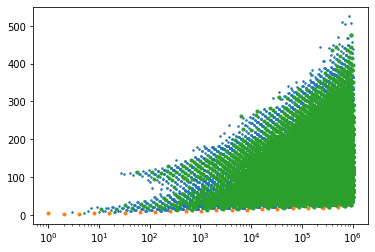

In [65]:
fig, axe = plt.subplots()
axe.semilogx(flights, '.', markersize=3)
df.loc[df["2^n"],"tof"].plot(ax=axe, linestyle="none", marker=".")
df.loc[df["11"],"tof"].plot(ax=axe, linestyle="none", marker=".")